In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
for item in df.iloc[: , :-1].columns:
    print(f"No of zero values in  {item} -- {len(df.loc[df[item] == 0])}")


No of zero values in  Pregnancies -- 111
No of zero values in  Glucose -- 5
No of zero values in  BloodPressure -- 35
No of zero values in  SkinThickness -- 227
No of zero values in  Insulin -- 374
No of zero values in  BMI -- 11
No of zero values in  DiabetesPedigreeFunction -- 0
No of zero values in  Age -- 0


In [6]:
zero_val_feature = [x for x in df.iloc[:,:-1].columns if x != 'DiabetesPedigreeFunction' and x != 'Age' and x != 'Pregnancies']
zero_val_feature

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [7]:
for feature in zero_val_feature:
    df[feature] = df[feature].replace(0 , df[feature].mean())

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [8]:
for i in zero_val_feature:
    if i != 'BMI':
        df[i] = df[i].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


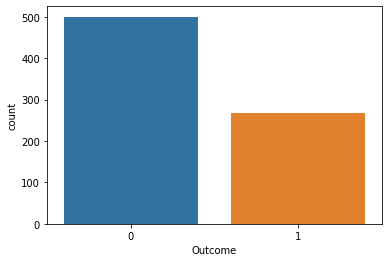

In [10]:
sns.countplot(data = df , x = 'Outcome')

our data set is imbalance

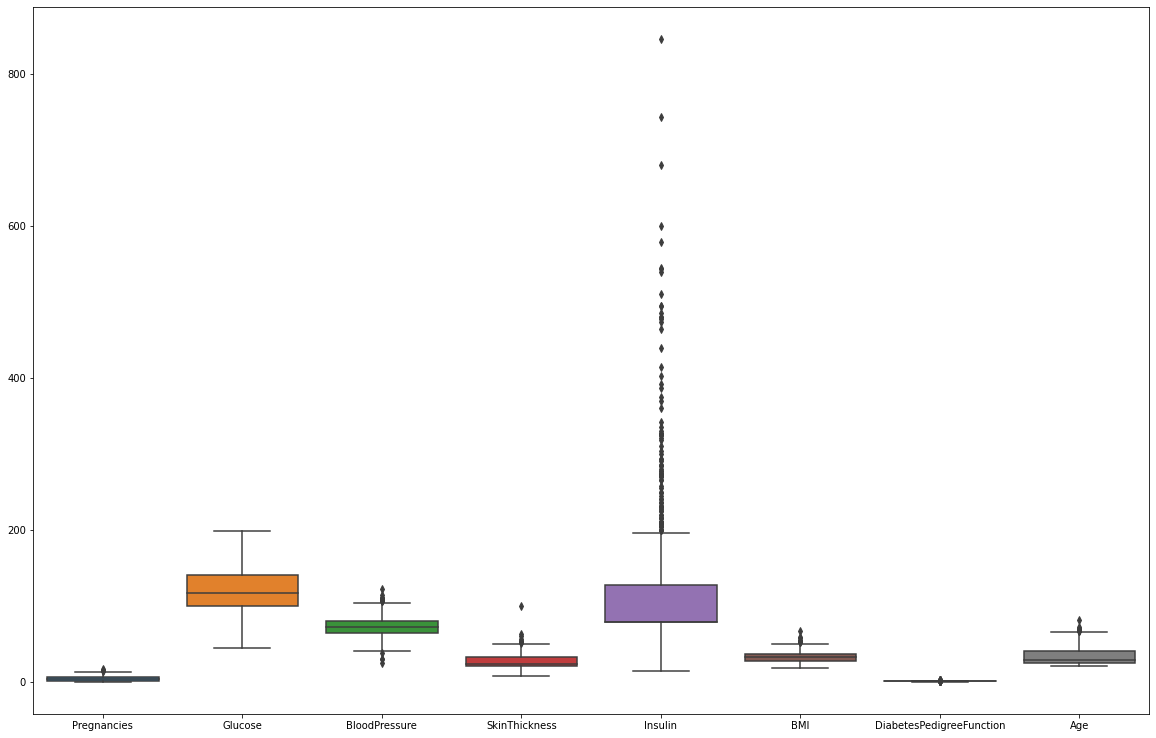

In [11]:
# Checking outliers in dataset
plt.figure(figsize = (20 , 13))
sns.boxplot(data = df.iloc[:,:-1] )

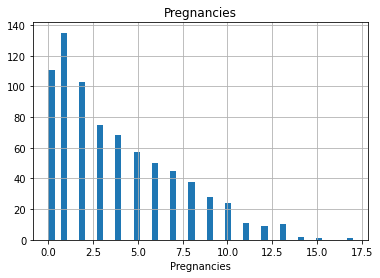

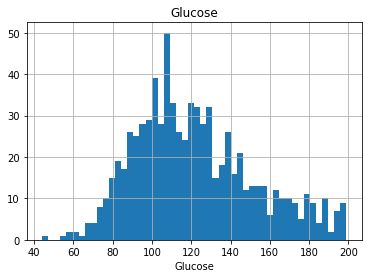

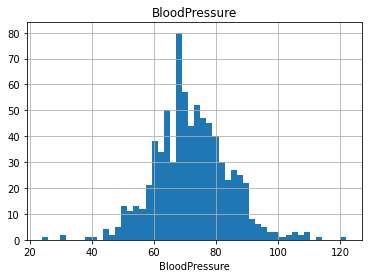

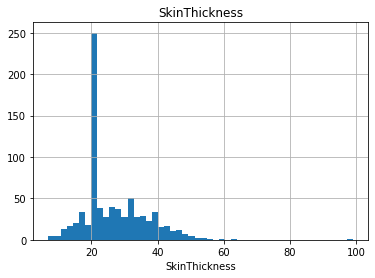

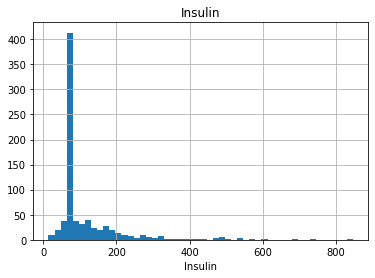

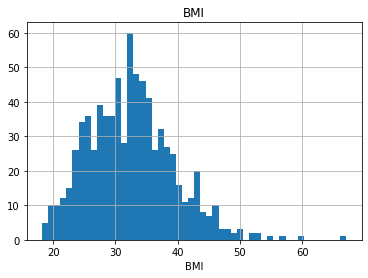

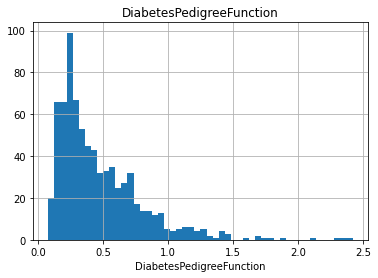

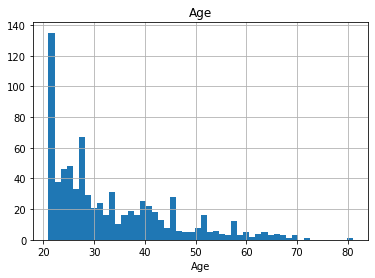

In [12]:
# Checking distribution of features
for feature in df.iloc[: , :-1].columns:
    figure = df[feature].hist(bins = 50)
    figure.set_xlabel(feature)
    figure.set_title(feature)
    plt.show()

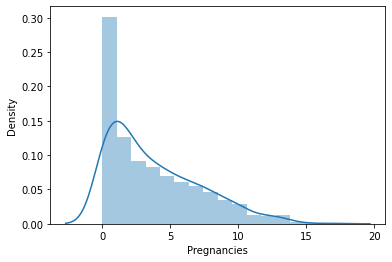

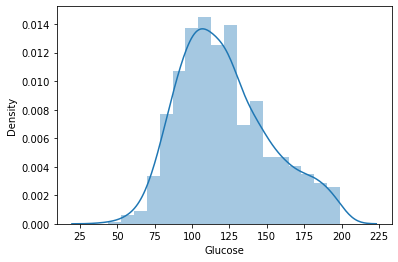

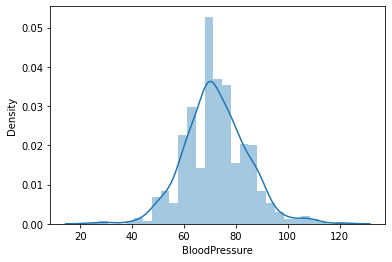

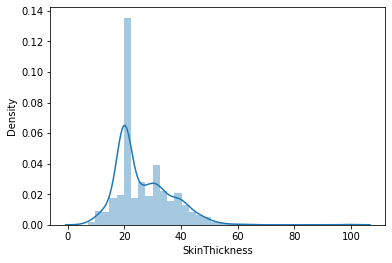

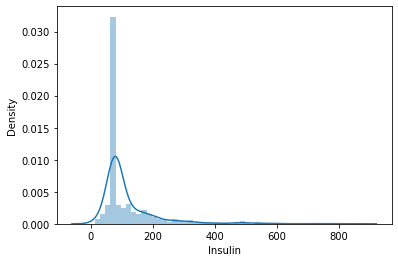

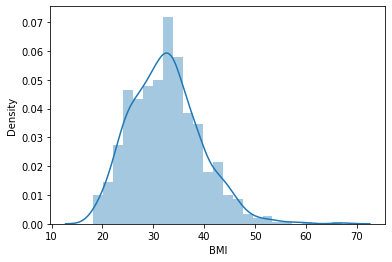

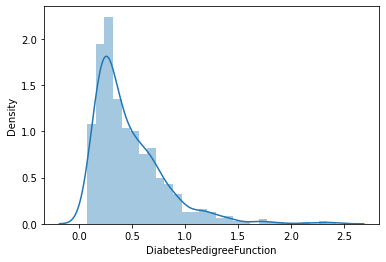

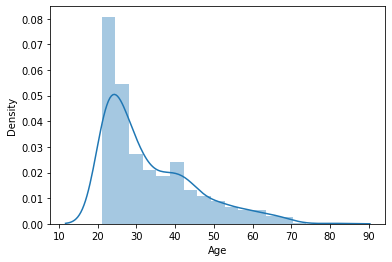

In [13]:
for feature in df.iloc[: , :-1].columns:
    sns.distplot(df[feature] )
    plt.show()

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
normal_distr = ['Glucose'   ]
left_right_skewd = ['Pregnancies' ,'Insulin', 'SkinThickness' ,'BMI' ,'DiabetesPedigreeFunction' ,'Age', 'BloodPressure' ]

In [16]:
print('For normally distributed feature')
print("")
for i in normal_distr:
    print(i)
    upper_boundry = df[i].mean() + 3*df[i].std()
    lower_boundry = df[i].mean() - 3*df[i].std()

    
    print("Upper Boundry - ",upper_boundry) , print("Lower Boundry - " ,lower_boundry)
    print('----------------')

For normally distributed feature

Glucose
Upper Boundry -  212.98453598205572
Lower Boundry -  30.367026517944268
----------------


In [17]:
print('For Left or Right skewd distributed feature')
print("")
for x in left_right_skewd:
    print(x)
    IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
    print("IQR - ",IQR)
    upper_bridge = df[x].quantile(0.75)+(IQR *1.5)
    lower_bridge = df[x].quantile(0.25) -(IQR*1.5)

    
    print("Upper Boundry - ",upper_bridge) , print("Lower Boundry - " ,lower_bridge)
    print('----------------')

For Left or Right skewd distributed feature

Pregnancies
IQR -  5.0
Upper Boundry -  13.5
Lower Boundry -  -6.5
----------------
Insulin
IQR -  48.25
Upper Boundry -  199.625
Lower Boundry -  6.625
----------------
SkinThickness
IQR -  12.0
Upper Boundry -  50.0
Lower Boundry -  2.0
----------------
BMI
IQR -  9.100000000000001
Upper Boundry -  50.25
Lower Boundry -  13.849999999999998
----------------
DiabetesPedigreeFunction
IQR -  0.38249999999999995
Upper Boundry -  1.2
Lower Boundry -  -0.32999999999999996
----------------
Age
IQR -  17.0
Upper Boundry -  66.5
Lower Boundry -  -1.5
----------------
BloodPressure
IQR -  16.0
Upper Boundry -  104.0
Lower Boundry -  40.0
----------------


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
normal_distr

['Glucose']

In [20]:
df.loc[df['Glucose'] >= 212 ,'Glucose'] = 212

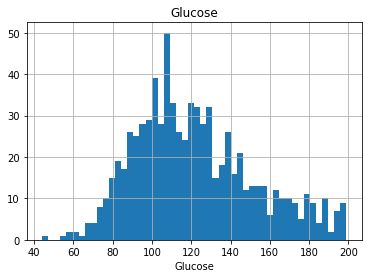

In [21]:
for i in normal_distr:
    figure = df[i].hist(bins = 50)
    figure.set_xlabel(i)
    figure.set_title(i)
    plt.show()

In [22]:
left_right_skewd
    

['Pregnancies',
 'Insulin',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'BloodPressure']

In [23]:
df.loc[df['Pregnancies'] >= 13 ,'Pregnancies'] = 13
df.loc[df['DiabetesPedigreeFunction'] >= 1.2 ,'DiabetesPedigreeFunction'] = 1.2
df.loc[df['SkinThickness'] >= 50 ,'SkinThickness'] = 50
df.loc[df['Insulin'] >= 199 ,'Insulin'] = 199
df.loc[df['BMI'] >= 50.25 ,'BMI'] = 50.25
df.loc[df['BloodPressure'] >= 104 ,'BloodPressure'] = 104
df.loc[df['BloodPressure'] <= 40 ,'BloodPressure'] = 40
df.loc[df['Age'] >= 66 ,'Age'] = 66

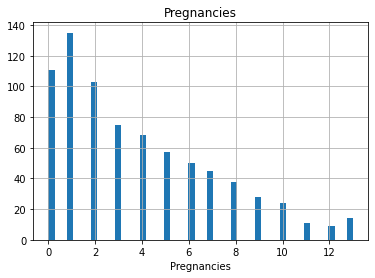

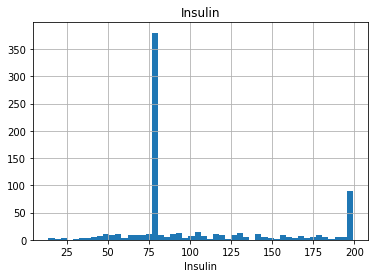

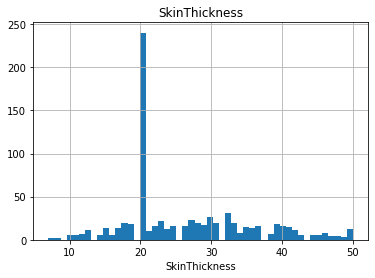

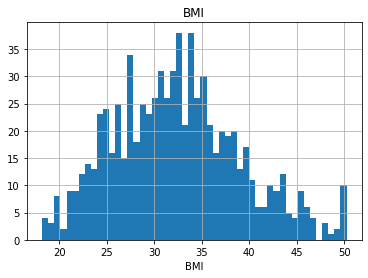

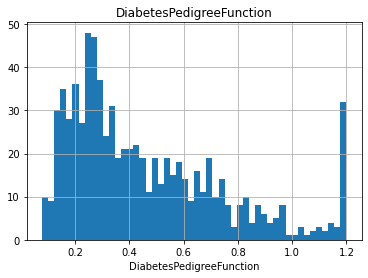

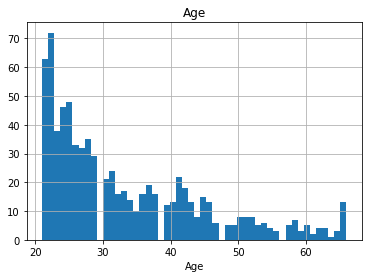

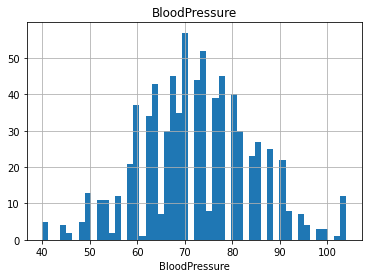

In [24]:
for i in left_right_skewd:
    figure = df[i].hist(bins = 50)
    figure.set_xlabel(i)
    figure.set_title(i)
    plt.show()

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.675781,72.221354,26.329427,103.572917,32.388956,0.458914,33.194010,0.348958
std,3.336808,30.436252,11.718024,9.250086,47.116017,6.667633,0.285596,11.611715,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,104.000000,50.000000,199.000000,50.250000,1.200000,66.000000,1.000000


In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.200,33,1


In [27]:
df1 =df.copy()

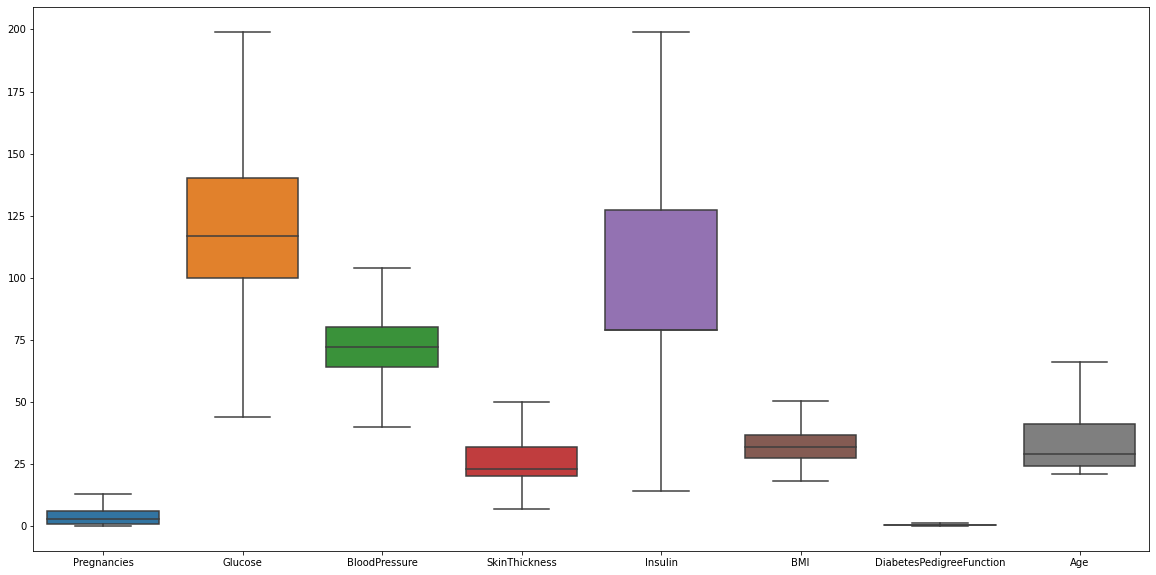

In [28]:
plt.figure(figsize=(20 , 10))
sns.boxplot(data = df1.iloc[: ,:-1])
plt.show()

In [29]:
X = df1.drop('Outcome', axis = 1)
y = df1['Outcome']

print(f"Independent variable shape - {X.shape}")
print(f"Dependent variable shape - {y.shape}")

Independent variable shape - (768, 8)
Dependent variable shape - (768,)


In [30]:
from sklearn.feature_selection  import mutual_info_classif

In [31]:
Mutual_info = mutual_info_classif(X,y)

Mutual_data = pd.Series(Mutual_info , index = X.columns)
important_feature_weight =  Mutual_data.sort_values(ascending = False)
important_feature_weight

Glucose                     0.119300
BMI                         0.091956
Age                         0.066589
Insulin                     0.042846
Pregnancies                 0.037951
SkinThickness               0.009010
DiabetesPedigreeFunction    0.000000
BloodPressure               0.000000
dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0)

In [33]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [34]:
os = RandomOverSampler(0.75)
X_train_os , y_train_os = os.fit_resample(X_train , y_train)

In [35]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 393, 1: 221})
The number of classes after fit Counter({0: 393, 1: 294})


###**Model Creation**

In [36]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [38]:
def model_accuracy():
    data= {}
    model_algo = {
        "XGBoost" : XGBClassifier(),
        "RandomForest" : RandomForestClassifier(),
        "AdaBoost" : AdaBoostClassifier(),
        "Logistic" : LogisticRegression()
    }

    for name , algo in model_algo.items():
        algo.fit(X_train_os , y_train_os)
        y_pred = algo.predict(X_test)
        accuracy = accuracy_score(y_test , y_pred)
        data[name] = accuracy

    data = list(data.items())
    dataframe = pd.DataFrame(data , columns=['Algorithm' , 'Accuracy'])
    dataframe.sort_values(by = 'Accuracy' ,ascending=False )
    print(dataframe)
    print(type(dataframe))

In [39]:
model_accuracy()

[17:57:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Algorithm  Accuracy
0       XGBoost  0.805195
1  RandomForest  0.811688
2      AdaBoost  0.785714
3      Logistic  0.805195
<class 'pandas.core.frame.DataFrame'>


###**Hyper Parameter Tuning**

In [40]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5 , random_state= 0 , test_size=0.2)

In [51]:
RF = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=0.8, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
RF.fit(X_train_os,y_train_os)
R_y_pred = RF.predict(X_test)
print(accuracy_score(y_test , R_y_pred))
print(confusion_matrix(y_test , R_y_pred))
print(classification_report(y_test,R_y_pred))

0.8311688311688312
[[90 17]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       107
           1       0.69      0.81      0.75        47

    accuracy                           0.83       154
   macro avg       0.80      0.82      0.81       154
weighted avg       0.84      0.83      0.83       154



**GridSearchCV to AdaBoostClassifier**

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
AdaBoost = AdaBoostClassifier()

clf = GridSearchCV(AdaBoost ,parameters , n_jobs=-1, cv = 5 ,verbose=1 )
clf.fit(X_train_os , y_train_os)
clf.best_estimator_

AdaBoost = AdaBoostClassifier(learning_rate=0.99, n_estimators=9,algorithm='SAMME.R')
AdaBoost.fit(X_train_os , y_train_os)
y_pred = AdaBoost.predict(X_test)
print(f"Acuracy - {accuracy_score(y_pred , y_test)}")
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Acuracy - 0.7792207792207793
[[90 17]
 [17 30]]
0.7792207792207793
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.64      0.64      0.64        47

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154



In [44]:
AdaBoost.score(X_test , y_test)

0.7792207792207793

**AdaBoost accuracy - 77%**

In [45]:
clf.best_estimator_

AdaBoostClassifier(learning_rate=1.04, n_estimators=20)

In [46]:
RF_model = RandomForestClassifier(n_estimators= 1180, max_features = 'log2', max_depth = 54.254942640847595, min_samples_split = 5, min_samples_leaf = 1, criterion = 'entropy')
RF_model.fit(X_train_os , y_train_os)
RF_y_pred = RF_model.predict(X_test)
print(RF_model.score(X_test , y_test))
print(f"Accuracy --  {accuracy_score( y_test ,RF_y_pred)}")

0.8246753246753247
Accuracy --  0.8246753246753247


In [47]:
print(confusion_matrix(y_test,RF_y_pred))
print(accuracy_score(y_test,RF_y_pred))
print(classification_report(y_test,RF_y_pred))

[[92 15]
 [12 35]]
0.8246753246753247
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



In [48]:
print(accuracy_score(y_test,RF_y_pred))

0.8246753246753247


###**Random Forest giving Accuracy of 83%**

In [49]:
import pickle

In [53]:
with open("RF_Diabetes_Clf_.pkl" , "wb") as file:
    pickle.dump(RF , file)
